<a href="https://colab.research.google.com/github/OfficialMehak/Basics-of-CNN/blob/main/Basics_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fashionmnist:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2243%2F9243%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240702%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240702T060530Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dacf72d6ecfe8b568e5e3587c68deb7a657dcae30490ed5ad92be3f1b578d2631a4f8f85fee7b6dc93b2ababfda1e944d6e1c4dda2c25d28b47aacfa21f77521ed5c97f968649a8c8ffddc0fbea44d1744393432fe32375bbe8f9ef6c5249e211c18b67f031c6b11bc8748199af4e70476a071fcb2de5894c528e53d79959d72199abe68c2bf87e83d6789e8fbc47a2690b6d9b757312531ec576504d86641cc806ff55dd2551fe338cf410968528c8ced052c39f9301db5a0c0004a7948462f24ec461cf49eba157d8e1f78efe6312d93030f2c9ee6515d7e4b2ba71b157e36a77f8d4a30c5bd16b5be6b6223873c22d54b505a8506c5dfbe3210c51ced04392'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# Convolutional Neural Networks for a multiclass classification

## This notebook will cover the following two major topics :

- Understand the basic concepts of CNN model
- Implement CNN model in realtime using Fashion MNIST dataset


# CNN Model

### Three basic components to define a basic convolutional neural network.

- The Convolutional Layer
- The Pooling layer
- The Output layer

<img src="https://www.researchgate.net/publication/336805909/figure/fig1/AS:817888827023360@1572011300751/Schematic-diagram-of-a-basic-convolutional-neural-network-CNN-architecture-26.ppm" />

## The Convolutional Layer:
In a convolutional layer, we use a weight matrix to extract specific features from an image. The weight matrix is like a filter that moves across the image, covering all the pixels. By multiplying the weight matrix with the corresponding part of the input image and adding the results, we obtain a convolved output. This process helps in sharing parameters and extracting useful features from the image. As we add more convolutional layers, the features extracted become more complex and specific.

![image.png](attachment:562e633a-94f0-4d55-90a6-44d561ef29e4.png)

# The Pooling Layer:
Pooling layers are used to reduce the size of images and the number of parameters in a network. The most common type is max pooling, where the maximum value within a specific region is taken. By applying pooling independently to each depth dimension, the depth remains the same while the spatial size of the image decreases. This helps in retaining important information while reducing computational complexity.



<img src="https://miro.medium.com/v2/resize:fit:990/1*hOI0jW3CcS_yuxcmJIYjKw.gif" />

# The Output Layer:
The output layer is the final layer of a convolutional neural network (CNN). It takes the output from previous layers and generates the final prediction. To do this, a fully connected layer is used, which maps the input to the desired number of classes. The output layer has a loss function, such as categorical cross-entropy, to measure the error in the prediction. Through backpropagation, the weights and biases of the network are updated to minimize the error and improve the accuracy of the predictions.

# Fashion MNIST Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

## Labels
Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

## Dataset in 3-D space
<img src="https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/embedding.gif?raw=true" />

# Implement CNN model in realtime using Fashion MNIST dataset

# 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20


2024-07-02 05:07:04.885245: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 05:07:04.885358: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 05:07:05.002549: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2 Getting the Dataset ready
# 2.1 Read the Dataset

In [ ]:
train_df = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv', sep = ',')

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2.2 Preprocessing

In [ ]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

#### Important Note : Since the image data in x_train and x_test is from 0 to 255 , we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 . It's important that the training set and the testing set be preprocessed in the same way

In [ ]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

# 2.3 Train Test Val Split

In [ ]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 42)

# 2.4 Visualization

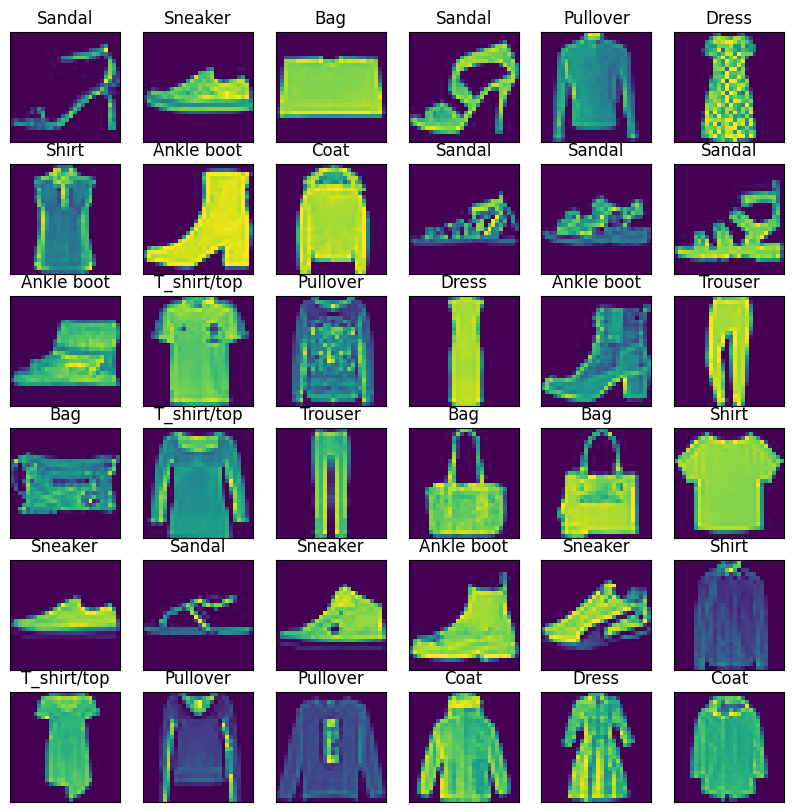

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

# 2.5 Reshaping to the correct size

In [ ]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)


# 3 CNN Model
# 3.1 Defining the Model

- Convolutional Layer:
    - We add a Conv2D layer with 32 filters, each having a 3x3 kernel size.
    - ReLU activation function is applied to introduce non-linearity.
    - The input shape of the first layer is specified as image_shape.

- Max Pooling Layer:
    - We add a MaxPooling2D layer to downsample the output by taking the maximum value in each 2x2 region.
    - This reduces the spatial dimensions of the output to 14x14.

- Dropout Layer:
    - We add a Dropout layer with a rate of 0.2.
    - During training, 20% of the neurons in the previous layer will be randomly disabled to prevent overfitting.

- Flatten Layer:
    - We add a Flatten layer to convert the multi-dimensional output into a 1-dimensional vector.
    - This prepares the data for the fully connected layers.

- Fully Connected Layer:
    - We add a Dense layer with 32 units/neurons.
    - ReLU activation function is applied to introduce non-linearity.

- Output Layer:
    - We add a final Dense layer with 10 units/neurons, representing the number of classes in the classification task.
    - Softmax activation function is applied to obtain class probabilities.

In [ ]:
# Create a Sequential model
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=image_shape),
    # Add a convolutional layer with 32 filters, each having a 3x3 kernel size
    # Apply ReLU activation function to introduce non-linearity
    # Specify the input shape of the first layer as 'image_shape'

    MaxPooling2D(pool_size=2),
    # Add a max pooling layer to downsample the output by taking the maximum value in each 2x2 region
    # Reduces the spatial dimensions, resulting in a 14x14 output

    Dropout(0.2),
    # Add a dropout layer to randomly disable 20% of the neurons during training
    # Helps prevent overfitting by reducing co-adaptation between neurons

    Flatten(),
    # Flatten the multi-dimensional output into a 1-dimensional vector
    # Converts the output into a suitable format for feeding into a fully connected layer

    Dense(32, activation='relu'),
    # Add a fully connected layer with 32 units/neurons
    # Apply ReLU activation function to introduce non-linearity

    Dense(10, activation='softmax')
    # Add a final fully connected layer with 10 units/neurons (corresponding to the number of classes)
    # Apply softmax activation function to obtain class probabilities
])


In [ ]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3.2 Model Summary

In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       173,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,738 (678.66 KB)

 Trainable params: 173,738 (678.66 KB)

 Non-trainable params: 0 (0.00 B)

# 3.3 Training the Model

In [ ]:
%%time
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/75


2024-07-02 05:07:28.452190: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 676: 2.54938, expected 1.8941
2024-07-02 05:07:28.452253: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 677: 2.43661, expected 1.78133
2024-07-02 05:07:28.452266: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 678: 3.0544, expected 2.39912
2024-07-02 05:07:28.452276: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 679: 3.15541, expected 2.50013
2024-07-02 05:07:28.452288: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 680: 3.28667, expected 2.63139
2024-07-02 05:07:28.452300: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 681: 3.5899, expected 2.93462
2024-07-02 05:07:28.452317: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 682: 2.95859, expected 2.30331
2024-07-02 05:07:28.452329: E external/local

 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2757 - loss: 2.1598

I0000 00:00:1719896852.548204     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719896852.566121     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3270 - loss: 2.0854

2024-07-02 05:07:33.966291: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.71918, expected 2.72191
2024-07-02 05:07:33.966359: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 3.189, expected 2.19173
2024-07-02 05:07:33.966373: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 3.58425, expected 2.58697
2024-07-02 05:07:33.966383: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 3.68542, expected 2.68815
2024-07-02 05:07:33.966397: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 4.53013, expected 3.53285
2024-07-02 05:07:33.966413: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 4.36305, expected 3.36577
2024-07-02 05:07:33.966425: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 4.28292, expected 3.28565
2024-07-02 05:07:33.966435: E external/local_xla/xla/serv

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.3538 - loss: 2.0375

W0000 00:00:1719896856.941139     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-07-02 05:07:38.324059: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.24822, expected 0.979503
2024-07-02 05:07:38.324124: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.39693, expected 1.12822
2024-07-02 05:07:38.324138: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.51909, expected 1.25038
2024-07-02 05:07:38.324152: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 1.54492, expected 1.27621
2024-07-02 05:07:38.324169: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 25: 1.30902, expected 1.04031
2024-07-02 05:07:38.324181: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 27: 0.702543, expected 0.43383
2024-07-02 05:07:38.324192: E external/local_xla/xla/service

12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 663ms/step - accuracy: 0.3646 - loss: 2.0178 - val_accuracy: 0.6817 - val_loss: 1.1691
Epoch 2/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7109 - loss: 1.0107 - val_accuracy: 0.7548 - val_loss: 0.6886
Epoch 3/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7737 - loss: 0.6544 - val_accuracy: 0.7991 - val_loss: 0.5712
Epoch 4/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8020 - loss: 0.5671 - val_accuracy: 0.8206 - val_loss: 0.5151
Epoch 5/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8228 - loss: 0.5127 - val_accuracy: 0.8303 - val_loss: 0.4846
Epoch 6/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8323 - loss: 0.4832 - val_accuracy: 0.8403 - val_loss: 0.4591
Epoch 7/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8399 - loss: 0.4583 - val_accuracy: 0.8471 - val_loss: 0.4405
Epoch 8/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8451 - loss: 0.4423 - val_accuracy: 0.8505 - val_loss: 

# 3.4 Evaluating our model

Text(0.5, 1.0, 'Train - Accuracy')

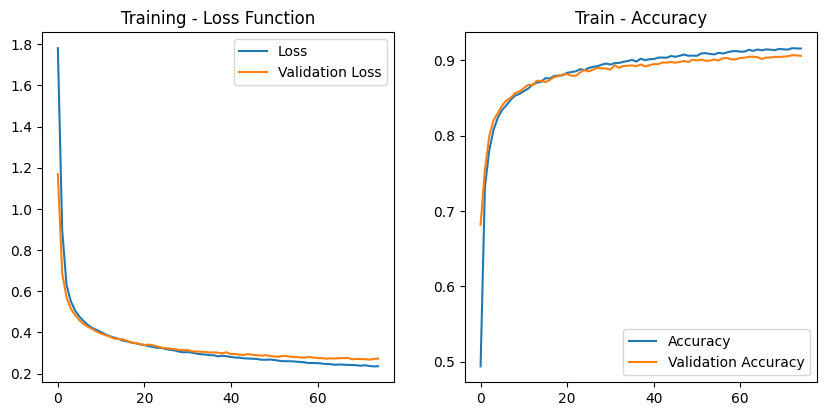

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

# 3.5 Testing the model on unseen data

In [ ]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Accuracy : {:.2f}'.format(score[1]*100) + '%')

2024-07-02 05:08:03.670956: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.35363, expected 1.53764
2024-07-02 05:08:03.671035: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.82107, expected 1.00508
2024-07-02 05:08:03.671045: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.81936, expected 1.00338
2024-07-02 05:08:03.671052: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.23827, expected 1.42229
2024-07-02 05:08:03.671060: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.05481, expected 2.23883
2024-07-02 05:08:03.671067: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.58554, expected 1.76955
2024-07-02 05:08:03.671075: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.00002, expected 2.18403
2024-07-02 05:08:03.671082: E external/local_xla/xla/se

Test Accuracy : 90.95%


# 3.6 Visualize some test labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


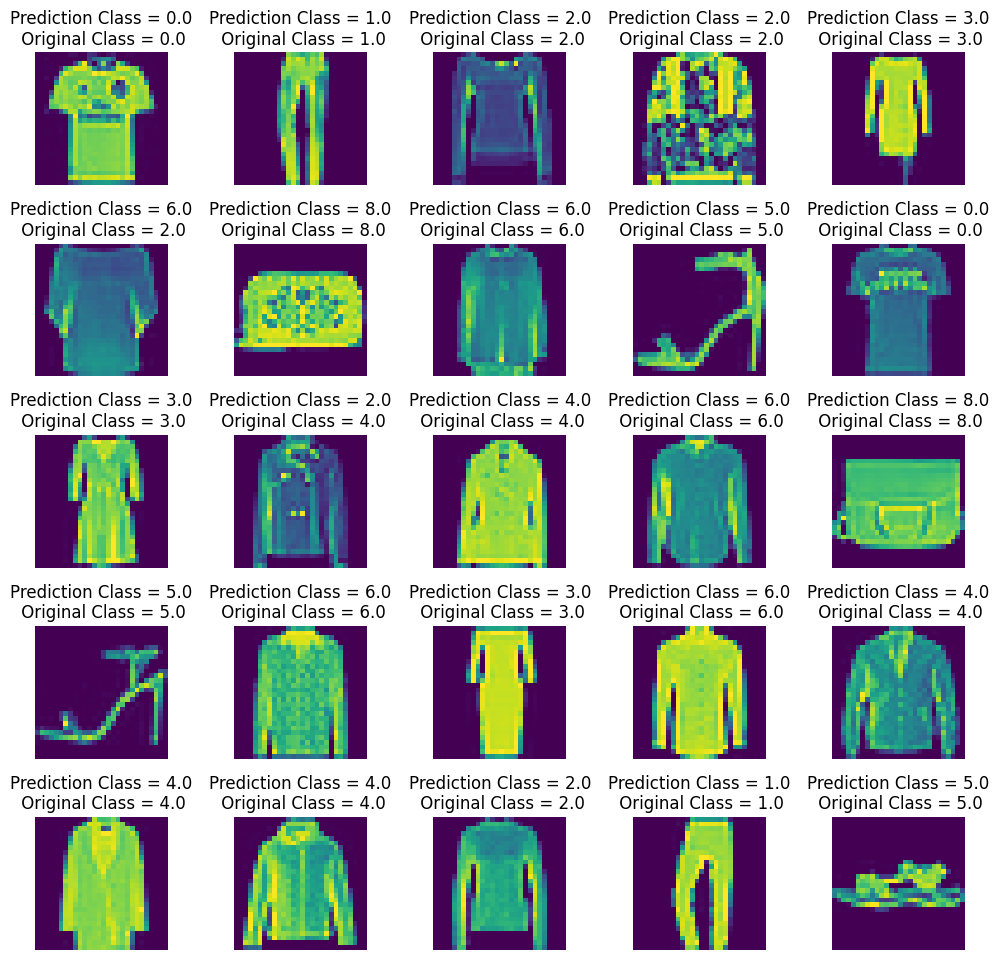

In [ ]:
predicted_probabilities = cnn_model.predict(x_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# Thank You for reading